# Logistic Regression

### 0. Iris flower dataset (*)
In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the datasets module from scikit-learn to load the iris dataset.

  a) Check keys on the loaded data and check what the different values for each key are.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score
import random
from scipy.stats import t

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [82]:
#print(f"Data: {iris['data']}")
print(f"Frame: {iris['frame']}")
print(f"Target: {iris['target']}")
print(f"Target Names: {iris['target_names']}")
print(f"Feature Names: {iris['feature_names']}")
print(f"File Name: {iris['filename']}")
print(f"Data Module: {iris['data_module']}")

Frame: None
Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target Names: ['setosa' 'versicolor' 'virginica']
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
File Name: iris.csv
Data Module: sklearn.datasets.data


In [83]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

b) Now insert the data into a DataFrame.

In [84]:
iris_X = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_y = pd.DataFrame(iris.target)
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
iris_y.rename({0:"Type"}, axis=1, inplace=True)
iris_y

,Type
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


c) Do some EDA to get an understanding of the dataset.

In [86]:
iris_X.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [87]:
iris_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
iris_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Type    150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

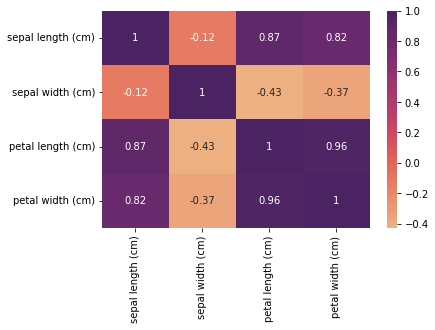

In [89]:
_ = sns.heatmap(iris_X.corr(), cmap="flare", annot=True)

The numbers represent the Pearson correlation coefficient (Pearson's _r_).

e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot.

In [90]:
iris_full = iris_X.join(iris_y)
iris_full.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


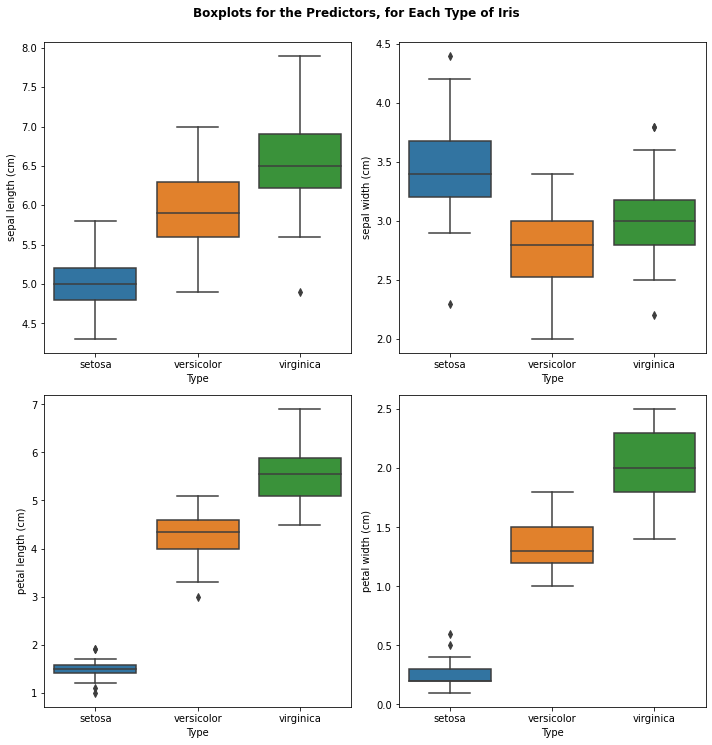

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, col in zip(axes.flatten(), iris_full.columns):
    sns.boxplot(data=iris_full, x="Type", y=col, ax=ax)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["setosa", "versicolor", "virginica"])

fig.tight_layout()
_ = fig.suptitle("Boxplots for the Predictors, for Each Type of Iris", y=1.03, fontweight="bold")

f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

In [92]:
def is_outlier(data:pd.DataFrame):

    outliers = pd.DataFrame(columns = data.columns)

    for variable in data.columns:
        Q1 = data[variable].quantile(0.25)
        Q3 = data[variable].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = pd.concat([outliers, data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]], axis=0)
    
    return outliers

In [93]:
setosa_outliers = is_outlier(iris_full[iris_full["Type"] == 0])
versicolor_outliers = is_outlier(iris_full[iris_full["Type"] == 1])
virginica_outliers = is_outlier(iris_full[iris_full["Type"] == 2])
outliers = pd.concat([setosa_outliers, versicolor_outliers, virginica_outliers], axis=0)
outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
15,5.7,4.4,1.5,0.4,0
41,4.5,2.3,1.3,0.3,0
13,4.3,3.0,1.1,0.1,0
22,4.6,3.6,1.0,0.2,0
24,4.8,3.4,1.9,0.2,0
44,5.1,3.8,1.9,0.4,0
23,5.1,3.3,1.7,0.5,0
43,5.0,3.5,1.6,0.6,0
98,5.1,2.5,3.0,1.1,1
106,4.9,2.5,4.5,1.7,2


In [94]:
iris_reduced = iris_full.drop(outliers.index, axis=0)

In [95]:
iris_reduced

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [96]:
print(len(iris_reduced[iris_reduced["Type"] == 0]))
print(len(iris_reduced[iris_reduced["Type"] == 1]))
print(len(iris_reduced[iris_reduced["Type"] == 2]))

42
49
46


### 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data.

In [97]:
X, y = iris_reduced.drop("Type", axis=1), iris_reduced["Type"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91, 4)
(46, 4)
(91,)
(46,)


In [99]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"Mean of Scaled X_train: {scaled_X_train.mean():.5f}")
print(f"Standard Deviation of Scaled X_train: {scaled_X_train.std():.5f}")
print(f"Mean of Scaled X_test: {scaled_X_test.mean():.5f}")
print(f"Standard Deviation of Scaled X_test: {scaled_X_test.std():.5f}")

Mean of Scaled X_train: 0.00000
Standard Deviation of Scaled X_train: 1.00000
Mean of Scaled X_test: 0.06995
Standard Deviation of Scaled X_test: 0.98671


### 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

In [100]:
# Reference: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# Logistic regression does not really have any critical hyperparameters to tune.
model = LogisticRegression() 

# Values to Try
solvers = ["newton-cg", "lbfgs", "liblinear"] # Test different solvers (algorithm to use in the optimization problem).
penalty = ["l2"] # l2 is the only penalty that works for all of these solvers (it is possible to try different kinds of penalties, however it will result in warnings).
c_values = [100, 10, 1.0, 0.1, 0.01] # Inverse of regularization strength, smaller values specify stronger regularization.

# Grid Search
grid = dict(solver = solvers, penalty = penalty, C = c_values) # Creates a dictionary with the values to try
grid_search = GridSearchCV(estimator = model, param_grid = grid) # Exhaustive search over specified parameter values for an estimator.
grid_result = grid_search.fit(scaled_X_train, y_train) # Run the Grid Search Cross Validation on the train data.

# Print Results
# Best Score
print(f"Best Score: {grid_result.best_score_:.4f} using {grid_result.best_params_}")
print()

# All results
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean: {mean:.3f}, Std: {stdev:.3f}, using the params: {param}") # Prints the mean values

Best Score: 0.9778 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

Mean: 0.967, Std: 0.044, using the params: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean: 0.967, Std: 0.044, using the params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean: 0.967, Std: 0.027, using the params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mean: 0.978, Std: 0.027, using the params: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean: 0.978, Std: 0.027, using the params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean: 0.944, Std: 0.035, using the params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Mean: 0.978, Std: 0.027, using the params: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean: 0.978, Std: 0.027, using the params: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean: 0.922, Std: 0.057, using the params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Mean: 0.889, Std: 0.061, using the params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [101]:
# Create the logistic regression model, using the params considered to be best by the cross validation (above)
model_logistic = LogisticRegression(solver="newton-cg", penalty="l2", C=10)
model_logistic.fit(scaled_X_train, y_train)
print(f"Weights: {model_logistic.coef_}")

Weights: [[-1.75663611  1.71228329 -3.01825372 -2.83723896]
 [ 0.7597608  -0.44171168 -1.33418937 -1.10180053]
 [ 0.99687531 -1.27057161  4.35244309  3.93903949]]


### 3. Evaluate model (*)

Make a prediction on the testing data. 

a) Check manually the first 10 values of $y_{test}$ against your prediction. 

In [102]:
y_pred = model_logistic.predict(scaled_X_test)

In [103]:
y_pred[:10], y_test[:10] #All of these are correctly classified

(array([2, 2, 0, 0, 2, 1, 1, 2, 2, 1]),
 115    2
 114    2
 12     0
 31     0
 136    2
 74     1
 72     1
 127    2
 146    2
 93     1
 Name: Type, dtype: int64)

b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

Accuracy: 0.978


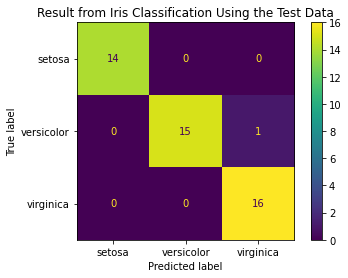

In [104]:
accuracy = accuracy_score(y_test, y_pred) #Check the correct values against the predicted
print(f"Accuracy: {accuracy:.3f}")

cm = confusion_matrix(y_test, y_pred)
cm_fig = ConfusionMatrixDisplay(cm, display_labels=["setosa", "versicolor", "virginica"]).plot()
_ = cm_fig.ax_.set(title="Result from Iris Classification Using the Test Data")

In [105]:
y_test == y_pred

115     True
114     True
12      True
31      True
136     True
74      True
72      True
127     True
146     True
93      True
92      True
53      True
77     False
75      True
36      True
50      True
32      True
21      True
145     True
64      True
138     True
4       True
121     True
42      True
97      True
110     True
18      True
20      True
10      True
143     True
59      True
11      True
126     True
84      True
108     True
129     True
111     True
0       True
86      True
70      True
48      True
29      True
68      True
135     True
102     True
52      True
Name: Type, dtype: bool

In [106]:
iris_reduced.iloc[77] # This is the value that was misclassified

sepal length (cm)    6.0
sepal width (cm)     3.4
petal length (cm)    4.5
petal width (cm)     1.6
Type                 1.0
Name: 85, dtype: float64

c) Print a classification report 

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



### 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score} \pm \sigma_{score}$, i.e. average $\pm$ standard deviation of the score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overal accuracy. Do the cross-validation manually using for statement. 

In [108]:
def cross_validation_for_iris_data(X:pd.DataFrame, y:pd.Series, model:model_logistic, k:int):
    
    # Scales the data and converts scaled_X and y to data frames
    scaler = StandardScaler()
    scaled_X = pd.DataFrame(scaler.fit_transform(X))
    y = pd.DataFrame(y)
    y.reset_index(drop=True, inplace=True) # Reset index (so it is the same as the index for X which is changed when scaled)

    # Creates lists to save to
    accuracy = []
    precision_setosa, precision_versicolor, precision_virginica = [], [], []
    recall_setosa, recall_versicolor, recall_virginica = [], [], []
    f1_setosa, f1_versicolor, f1_virginica = [], [], []
    
    list_of_indexes = scaled_X.index.values.tolist() # Saves the indexes as a list
    test_size = int(len(scaled_X) / k) #The test size to use when creating the X_test

    for _ in range(k): # Loop through k times (we will train and test k times)

        if len(list_of_indexes) > (test_size + test_size / 2): 
            test_indexes = random.sample(list_of_indexes, test_size)
        else: # If less than (test_size + 1/2 test_size) indexes left, create the last test data with the remaining indexes
            test_indexes = random.sample(list_of_indexes, len(list_of_indexes)) 
        
        [list_of_indexes.remove(i) for i in test_indexes] # Remove the indexes that has been used for testing

        # Train | test split, using the test_indexes for test
        X_train = scaled_X.drop(test_indexes, axis=0)
        X_test = scaled_X.iloc[test_indexes]
        y_train = np.ravel(y.drop(test_indexes, axis=0))
        y_test = np.ravel(y.iloc[test_indexes])

        # Fit the data and predict on X_test
        model.fit(X_train, y_train)
        y_pred =  model.predict(X_test)

        # Calculates accuracy, precision, recall and f1
        accuracy.append(accuracy_score(y_test, y_pred))
        precision = precision_score(y_test, y_pred, average=None)
        precision_setosa.append(precision[0])
        precision_versicolor.append(precision[1])
        precision_virginica.append(precision[2])
        recall = recall_score(y_test, y_pred, average=None)
        recall_setosa.append(recall[0])
        recall_versicolor.append(recall[1])
        recall_virginica.append(recall[2])
        f1 = f1_score(y_test, y_pred, average=None)
        f1_setosa.append(f1[0])
        f1_versicolor.append(f1[1])
        f1_virginica.append(f1[2])

    #Creates a data frame with Precision, Recall and f1, for each flower type
    data = {"Precision" : [np.mean(precision_setosa), np.mean(precision_versicolor), np.mean(precision_virginica)],
            "Recall" : [np.mean(recall_setosa), np.mean(recall_versicolor), np.mean(recall_virginica)], 
            "f1" : [np.mean(f1_setosa), np.mean(f1_versicolor), np.mean(f1_virginica)]}
    scores = pd.DataFrame(data, index=["setosa", "versicolor", "virginica"])

    return scores, accuracy

In [109]:
model_logistic = LogisticRegression(solver="newton-cg", penalty="l2", C=10)
scores, accuracy = cross_validation_for_iris_data(X, y, model_logistic, 10)
scores

,Precision,Recall,f1
setosa,1.000000,1.000000,1.000000
versicolor,0.983333,0.941667,0.959957
virginica,0.938333,0.975000,0.954798


In [110]:
accuracy

[0.9230769230769231,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9230769230769231,
 0.8461538461538461,
 1.0]

In [114]:
lower = np.mean(accuracy) - t.ppf(.975, (len(accuracy)-1)) * (np.std(accuracy) / np.sqrt(len(accuracy)))
upper = np.mean(accuracy) + t.ppf(.975, (len(accuracy)-1)) * (np.std(accuracy) / np.sqrt(len(accuracy)))
print(f"Confidence Interval: [{lower:.3f}, {upper:.3f}]")
print(f"Mean Accuracy: {np.mean(accuracy):.3f}")

Confidence Interval: [0.933, 1.006]
Mean Accuracy: 0.969


The data is skewed and the confidence interval is therefore not realistic, since the upper bound is above 1. 